In [72]:
# Comparison of anti-cancer skin treatment Capomulin versus other skin cancer treatment performed on 249 mice.
# A 45 days study that observed and measured scc tumor growths in mice to determine the efficacy of Capomulin compared to other treatment regimens.
# A summary of observations and insights using tables and figures to present the study results:
#                Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data.
#                  (Include these observation at the top of notebook)

In [226]:
# Interactive charting with %matplotlib notebook wasn't include because we will be creating multiple plots in a single notebook/lab w/o turning off interactive window.
# Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import os

In [227]:
# 1. Check the data for any mouse ID with duplicate timepoints and remove any data associated with that mouse ID.

df = pd.read_csv(os.path.join("Resources", "Study_results.csv"))
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [228]:
# (1.Continued) Merging two relational data sets 
# Load from Resource folder and Read CSV files with mouse metada and study results (split into 2 files) 
# test with df.head and df.describe to make sure data loading properly
# file_to_load = "Resources/Mouse_metadata.csv"
# file_to_load_two = "Resources/Study_results.csv"
# df = pd.read_csv(file_to_load)
# df = pd.read_csv(file_to_load_2)
# combine the data into a single dataset using merge function

mouse_metadata_one = pd.read_csv(os.path.join("Resources", "Mouse_metadata.csv"))
study_results_two = pd.read_csv(os.path.join("Resources", "Study_results.csv"))

combine_mouse_study = pd.merge(mouse_metadata_one, study_results_two, on="Mouse ID")
combine_mouse_study.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [258]:
# 2. Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
# Use Pandas Groupby.agg() function on a groupby - Multiple aggregations of the same column using combine_mouse_study which is the merge dataset

#df = combine_mouse_study
# df.aggregate(["mean", "median", "var", "std"]), these two df statements will be for each column alone.
# combine_mouse_study.groupby("Drug Regimen", as_index=False).agg({"Age_months": [np.mean, np.median, np.var, np.std],})

combine_mouse_study.groupby("Drug Regimen", as_index=False).agg({"Age_months": "median"})
df.groupby("Drug Regimen").aggregate(["mean", "median", "var", "std"])


# df = combine_mouse_study 
# df.groupby("Drug Regimen").agg(["mean", "median", "var", "std"])


# df.groupby("Drug Regimen", as_index=False).aggregate(["mean", "median", "var", "std"])
# Want tumor volume only and SEM??


Age_months                             Weight (g)         \
                   mean median        var       std       mean median   
Drug Regimen                                                            
Capomulin     13.456522   16.5  59.620372  7.721423  19.965217   20.5   
Ceftamin      13.247191   12.0  65.147591  8.071406  27.398876   28.0   
Infubinol     16.230337   20.0  56.404272  7.510278  27.196629   27.0   
Ketapril      15.659574   18.0  36.236432  6.019670  27.861702   28.0   
Naftisol      12.000000    9.0  45.102703  6.715855  27.166667   27.0   
Placebo       10.734807   10.0  40.384837  6.354907  27.928177   28.0   
Propriva      10.894410    8.0  53.357531  7.304624  27.043478   26.0   
Ramicane      10.684211    9.0  35.362393  5.946629  19.679825   19.0   
Stelasyn      12.784530   14.0  63.036648  7.939562  27.856354   28.0   
Zoniferol     12.598901   12.5  33.479115  5.786114  27.692308   28.0   

                                   Timepoint                                \
                    var       std       mean median         var        std   
Drug Regimen                                                                 
Capomulin      7.466034  2.732404  21.565217     20  206.928043  14.384994   
Ceftamin       2.501016  1.581460  19.747191     20  204.031772  14.283969   
Infubinol      4.769028  2.183810  18.174157     15  181.534470  13.473473   
Ketapril       3.392536  1.841884  19.707447     20  196.839089  14.029935   
Naftisol       2.247748  1.499249  19.623656     20  201.208951  14.184814   
Placebo        3.378146  1.837973  18.674033     15  192.954266  13.890798   
Propriva       2.791848  1.670882  16.863354     15  181.506211  13.472424   
Ramicane      10.465318  3.235014  21.425439     20  203.796178  14.275720   
Stelasyn       2.701473  1.643616  19.226519     20  191.620626  13.842710   
Zoniferol      2.015300  1.419612  19.368132     15  206.918979  14.384679   

             Tumor Volume (mm3)                                  \
                           mean     median        var       std   
Drug Regimen                                                      
Capomulin             40.675741  41.557809  24.947764  4.994774   
Ceftamin              52.591172  51.776157  39.290177  6.268188   
Infubinol             52.884795  51.820584  43.128684  6.567243   
Ketapril              55.235638  53.698743  68.553577  8.279709   
Naftisol              54.331565  52.509285  66.173479  8.134708   
Placebo               54.033581  52.288934  61.168083  7.821003   
Propriva              52.322552  50.854632  42.351070  6.507770   
Ramicane              40.216745  40.673236  23.486704  4.846308   
Stelasyn              54.233149  52.431737  59.450562  7.710419   
Zoniferol             53.236507  51.818479  48.533355  6.966589   

             Metastatic Sites                             
                         mean median       var       std  
Drug Regimen                                              
Capomulin            0.713043      0  0.720790  0.848993  
Ceftamin             1.179775      1  1.402527  1.184283  
Infubinol            0.960674      1  1.054942  1.027104  
Ketapril             1.297872      1  1.942883  1.393873  
Naftisol             1.182796      1  1.479919  1.216519  
Placebo              1.441989      1  1.792449  1.338824  
Propriva             0.975155      1  1.174379  1.083688  
Ramicane             0.548246      0  0.477838  0.691259  
Stelasyn             0.872928      1  0.944874  0.972046  
Zoniferol            1.230769      1  1.559711  1.248884

Text(0, 0.5, 'Total Mice for each Drug')

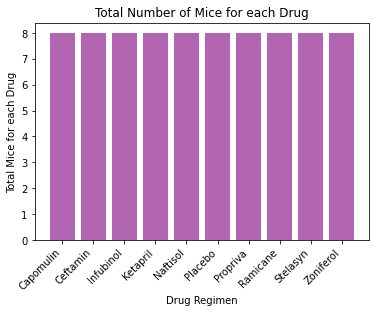

In [239]:
# 3. Create a bar plot using Matplotlib' pyplot that shows the number of total mice for each treatment regimen throughout the course of study.
# Matplotlib.pyplot.bar:

# treatment = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
# total_mice = ["Mouse ID"]
# x_axis = np.arange(len(total_mice))

df.total_mice = np.arange(len("Mouse ID"))
x_axis = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
          
plt.bar(x_axis, total_mice, color="purple", alpha=0.6)
plt.title("Total Number of Mice for each Drug")
plt.xticks(x_axis, rotation=45, ha ="right")
plt.xlim()
plt.ylim()
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice for each Drug")

In [247]:
# df.total_mice = len("Mouse ID")
# print(df)


mice = ["Mouse ID"]
mice.sort()
print(mice)

# np.unique("Mouse ID", "Drug Regimen")

['Mouse ID']


In [245]:
# 3B. Create a bar plot using both Panda's DataFrame.plot() that shows the number of total mice for each treatment regimen throughout the course of study

treatment = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"

df = pd.DataFrame({"Drug Regimen", "Mouse ID"})
df.total_mice = np.arange(len("Mouse ID"))
             
x_axis = np.arange(len(total_mice))
plotdata[x_axis, "treatment"].plot(kind="bar")


SyntaxError: invalid syntax (<ipython-input-245-eba9409ad703>, line 5)

([<matplotlib.patches.Wedge at 0x286b8d815c8>,
 [Text(-0.08220309805452111, -1.096924177265794, 'Female'),
  Text(0.10088549429694645, 1.346225136089971, 'Male')],
 [Text(-0.044838053484284233, -0.5983222785086149, '47.619%'),
  Text(0.0635204964091885, 0.8476232338344262, '52.381%')])

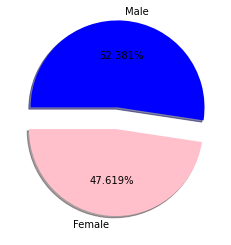

In [71]:
# 4A. Generate a pie plot using Matplotlib' pyplot that shows the distribution of female or male mice in the study.

#labels for the sections of pie chart
labels = ["Female", "Male"]
# The values of each section of the pie chart
sizes = [100, 110]
# The colors of each section of the pie chart
colors = ["pink", "blue"]
# Tells matplotlib to separate the "Male" section from the others
explode = [0, 0.25]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.3f%%", shadow=True, startangle=180)

In [ ]:
# 4B. Generate a pie plot using Panda's DataFrame.plot() that shows the distribution of female or male mice in the study.

# labels for the sections of pie chart
# labels = []

# The values of each section of the pie chart
# sizes = []
# The colors of each section of the pie chart
# colors = []
# Tells matplotlib to separate the "Smurfs"section from the others
# explode = []



In [ ]:
# 5. Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 
#    Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

IQR = Q3 - Q1


In [ ]:
# 6. Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight 
#     any potential outliers in the plot by changing their color and style.



plt.figure()
plt.boxplot()

In [ ]:
# 7. Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.




In [ ]:
# 8. Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.




In [ ]:
# 9. Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment.
     Plot the linear regression model on top of the previous scatter plot.


